# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Importaré la biblioteca de pandas para llamar a los dataframes de cada archivo, mostraré la información y revisaré si están separados correctamente.

In [1]:
import pandas as pd # importar librerías
from matplotlib import pyplot as plt

In [2]:
orders = pd.read_csv("/datasets/instacart_orders.csv",sep=";") # leer conjuntos de datos en los DataFrames
products = pd.read_csv("/datasets/products.csv",sep=";")
aisles = pd.read_csv("/datasets/aisles.csv",sep=";")
departments = pd.read_csv("/datasets/departments.csv",sep=";")
order_products = pd.read_csv("/datasets/order_products.csv",sep=";")

In [3]:
orders.info()# mostrar información del DataFrame
orders.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
122213,3325291,121846,57,5,15,1.0
302775,2106618,61366,1,6,17,NaN
395526,2409034,153898,13,3,9,22.0
214780,1461133,16185,4,2,17,20.0
299632,293074,139376,7,4,14,8.0


In [4]:
products.info()# mostrar información del DataFrame
products.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
4277,4278,Herring In Real Sour Cream,95,15
21076,21077,Cara Cara Navel Orange,24,4
44006,44007,Milk Chocolate King Size Bar,45,19
9133,9134,White Meat Poultry & Pork Bbq Sauce,5,13
35166,35167,Organic Spicy Taco Seasoning,30,6


In [5]:
aisles.info()# mostrar información del DataFrame
aisles.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
103,104,spices seasonings
123,124,spirits
31,32,packaged produce
65,66,asian foods
68,69,soup broth bouillon


In [6]:
departments.info()# mostrar información del DataFrame
departments.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
1,2,other
20,21,missing
2,3,bakery
9,10,bulk
18,19,snacks


In [7]:
order_products.info(show_counts=True)# mostrar información del DataFrame
order_products.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
4076731,2648941,14913,2.0,1
2529552,566946,29487,2.0,0
332047,1015694,19019,29.0,0
3486252,3072212,35227,12.0,0
1320880,2768965,19370,8.0,1


In [8]:
display(order_products[order_products["add_to_cart_order"].isna()].groupby("order_id").count())

,product_id,add_to_cart_order,reordered
order_id,,,
9310,1,0,1
61355,63,0,63
102236,31,0,31
129627,5,0,5
165801,6,0,6
...,...,...,...
2999801,6,0,6
3125735,22,0,22
3308010,51,0,51


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

En el dataframe "orders" los días(days_since_prior_order ) están en float, además hay valores ausentes lo que puede significar que el cliente no tiene un pedido anterior o simplemente no se haya registrado bien el dato.

En el dataframe "products" existe valores ausentes en la columna "product_name"

En el dataframe "order_products" existe valores ausentes en la columna "add_to_cart_order", y el tipo de dato es float.



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Mostraré duplicados y eliminaré los datos, buscaré datos mal registrados y los corregiré.
Revisaré valores ausentes y veré si se puede reemplazar con algun dato,o si se debe eliminar o mantener.
Evaluaré la conversión de tipo de dato de ser necesario y si no modifica los datos, realizaré el cambio.


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [9]:
# Revisa si hay pedidos duplicados

print(orders.duplicated().sum())# calculo y muestro cantidad de duplicados

duplicados=orders[orders.duplicated()]

display(duplicados)# muestro las filas duplicadas



15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [10]:

display(orders[(orders["order_hour_of_day"]==2) & (orders["order_dow"]==3)])# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(orders["order_id"].value_counts()) # contar frecuencia

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


2125197    2
1782114    2
1286742    2
391768     2
1021560    2
          ..
1273706    1
689148     1
1752059    1
2794488    1
2047       1
Name: order_id, Length: 478952, dtype: int64


¿Qué sugiere este resultado?
Se registraron 121 filas de pedidos en ese horario y día, sin embargo la frecuencia de  "order_id" en muchos casos es mayor a 1, lo cual no es correcto porque cada pedido debería tener un identificador único.

In [11]:
# Elimina los pedidos duplicados

orders = orders.drop_duplicates()

In [12]:
# Vuelve a verificar si hay filas duplicadas
print(orders.duplicated().sum())

0


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(orders["order_id"].duplicated().sum())

0


Se encontró 15 filas duplicadas se verificó que es información repetida y se eliminó.

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())# calculo y muestro cantidad de duplicados

duplicados=products[products.duplicated()]

print(duplicados)# muestro las filas duplicadas


0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [15]:
# Verifica únicamente si hay IDs duplicadas de productos
print(products["product_id"].duplicated().sum())

0


In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products["product_name"]= products["product_name"].str.upper()
display(products[products["product_name"].duplicated()])

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
print(products[products["product_name"].duplicated()].dropna(subset=["product_name"]))


       product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Encontramos que no hay número de id de producto repetido, ni tampoco filas duplicadas. Sin embargo hay productos con mismo nombre y productos sin nombres.

Pienso que hubo errores en el registro de los nombres, pero podría bastar reconocer el producto por su id, y no ser necesario borrar la información ausente o repetida en nombre de producto.

### `departments` data frame

In [18]:
print(departments.duplicated().sum())# Revisa si hay filas totalmente duplicadas

0


In [19]:
print(departments["department_id"].duplicated().sum())# Revisa únicamente si hay IDs duplicadas de productos

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay filas duplicadas ni id duplicados.

### `aisles` data frame

In [20]:
print(aisles.duplicated().sum())# Revisa si hay filas totalmente duplicadas

0


In [21]:
print(aisles["aisle_id"].duplicated().sum())# Revisa únicamente si hay IDs duplicadas de productos

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay filas duplicadas ni id duplicados.

### `order_products` data frame

In [22]:
print(order_products.duplicated().sum())# Revisa si hay filas totalmente duplicadas


0


In [23]:
duplicados=order_products[["product_id","order_id"]].duplicated()

print(order_products[duplicados].sum()) # Vuelve a verificar si hay cualquier otro duplicado engañoso


order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay filas duplicadas, ni órdenes con productos duplicados.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
products[products["product_name"].isna()] # Encuentra los valores ausentes en la columna 'product_name'


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [25]:
products["aisle_id"][products["product_name"].isna()].nunique() 


1

In [26]:
products["department_id"][products["product_name"].isna()].nunique() 

1

Describe brevemente cuáles son tus hallazgos.
Todos los productos con nombre de productos ausentes son de "aisle_id"=100 y "department_id"=21

In [27]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 10
#si

In [28]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
#si

In [29]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

departments[departments["department_id"]==100]

,department_id,department


In [30]:
aisles[aisles["aisle_id"]==21]

,aisle_id,aisle
20,21,packaged cheese


Describe brevemente cuáles son tus hallazgos.
No hay registro de department_id =100, sin embargo si existe aisle_id=21

In [31]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"] = products["product_name"].fillna("Unknown")
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Existía valores ausentes en la columna "product_name2, reemplazamos estos valores por "Unknown"

### `orders` data frame

In [32]:
 # Encuentra los valores ausentes
orders.info()
print(orders.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [33]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
#no hay


In [34]:
orders[orders["order_number"]>=2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450135 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                450135 non-null  int64  
 1   user_id                 450135 non-null  int64  
 2   order_number            450135 non-null  int64  
 3   order_dow               450135 non-null  int64  
 4   order_hour_of_day       450135 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 24.0 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hay valores ausentes en "days_since_prior_order", lo que puede significar que aun no hay una segunda venta.





### `order_products` data frame

In [35]:
# Encuentra los valores ausentes

print(order_products.isnull().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [36]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
minimo= order_products["add_to_cart_order"].min()
maximo= order_products["add_to_cart_order"].max()

print(f"El valos mínimo es {minimo} y el valor máximo es {maximo}")

El valos mínimo es 1.0 y el valor máximo es 64.0


No en todos los pedidos se registró el orden en que se añadían los productos al carrito de compras.

In [37]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

ausentes_add= order_products[order_products["add_to_cart_order"].isna()]
display(ausentes_add)


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [38]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

display(ausentes_add.groupby("order_id").count())

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

print(ausentes_add.groupby("order_id").count().min()) # valores mínimos de la columna

,product_id,add_to_cart_order,reordered
order_id,,,
9310,1,0,1
61355,63,0,63
102236,31,0,31
129627,5,0,5
165801,6,0,6
...,...,...,...
2999801,6,0,6
3125735,22,0,22
3308010,51,0,51


product_id           1
add_to_cart_order    0
reordered            1
dtype: int64


Describe brevemente cuáles son tus hallazgos.

Los valores de la columna "add_to_cart" se muestra como 0


In [39]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products["add_to_cart_order"] = order_products["add_to_cart_order"].fillna(999)
order_products["add_to_cart_order"]=order_products["add_to_cart_order"].astype(int)

order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Se reemplazó los valores ausentes por 999 y se cambió el tipo de dato entero

## Conclusiones

Se realizó la limpieza de datos duplicado y ausentes, asi como el cambio de tipo de dato según se requería necesario. 

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:


1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [40]:
min_orderday= orders["order_hour_of_day"].min()
max_orderday= orders["order_hour_of_day"].max()
print(f"el valor mínimo de la columna order_hour_of_day es {min_orderday}") # el valor mínimo de la columna
print(f"el valor máximo de la columna order_hour_of_day es {max_orderday}") # el valor máximo de la columna


min_orderw= orders["order_hour_of_day"].min()
max_orderw= orders["order_hour_of_day"].max()

print(f"el valor mínimo de la columna order_dow es {min_orderw}") # el valor mínimo de la columna
print(f"el valor máximo de la columna oorder_dow es {max_orderw}") # el valor máximo de la columna

el valor mínimo de la columna order_hour_of_day es 0
el valor máximo de la columna order_hour_of_day es 23
el valor mínimo de la columna order_dow es 0
el valor máximo de la columna oorder_dow es 23


Los valores oscilan dentro del rango correcto.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

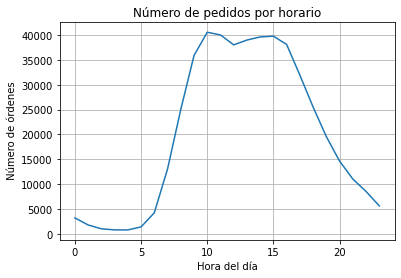

In [41]:


df = orders.groupby("order_hour_of_day")["order_id"].count() # agrupando por hora del día y cuenta las órdenes correspondientes
df.plot(x="order_hour_of_day",y="order_id",title="Número de pedidos por horario", xlabel="Hora del día",ylabel=" Número de órdenes",grid=True)
plt.show()

La mayor demanda de órdenes se dan entre las 10:00 am y 3:00 pm

### [A3] ¿Qué día de la semana compran víveres las personas?

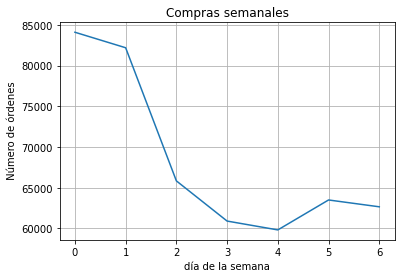

In [42]:


df = orders.groupby("order_dow")["order_id"].count() # agrupando por hora del día y cuenta las órdenes correspondientes
df.plot(x="order_dow",y="order_id",title="Compras semanales",xlabel="día de la semana", ylabel=" Número de órdenes",grid=True)
plt.show()


Los días de mayor demanda de órdenes son los domingos y lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

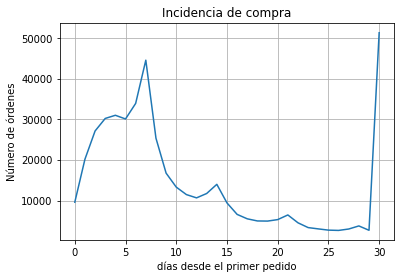

In [43]:
do=orders.groupby("days_since_prior_order")["order_id"].count()
do.plot(x="days_since_prior_order",y="order_id",title="Incidencia de compra",xlabel="días desde el primer pedido", ylabel="Número de órdenes",grid=True)
plt.show()

La mayoría vuelve a comprar en  5 a 7 días aproximadamente, o luego de 30 días.



1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

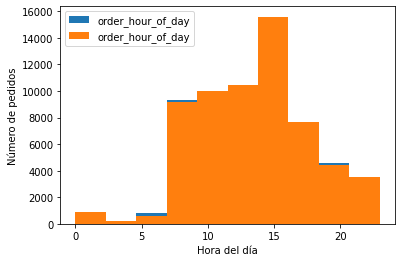

In [44]:
ordes_mie = orders["order_hour_of_day"][orders["order_dow"]==3]# filtrando los días miércoles y sábados
ordes_sab = orders["order_hour_of_day"][orders["order_dow"]==6]# filtrando los días miércoles y sábados

ordes_mie.plot(y="order_hour_of_day",kind="hist")

ordes_sab.plot(y="order_hour_of_day",kind="hist")

plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.legend()
plt.show() 

Tienes distribuciones similares, los pedidos que ingresan los miércoles y sábados tienen demanda similiar en horas determinadas.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
pedidos_cliente=orders.groupby("order_number")["user_id"].count()
print(pedidos_cliente)

order_number
1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: user_id, Length: 100, dtype: int64


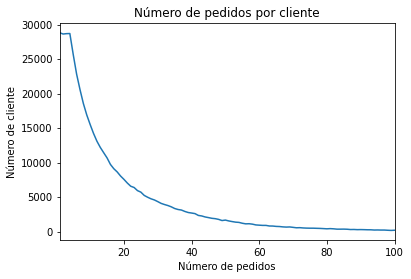

In [46]:
pedidos_cliente.plot(title="Número de pedidos por cliente",xlim=[1, 100],xlabel="Número de pedidos",ylabel="Número de cliente")
plt.show()

La distribución es un j invertida, cerca a 30000 clientes hicieron un pedido.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
productos_mas = order_products.groupby("product_id").count()["order_id"] #agrupamos por id de product y contamos las ventas

productos_mas = productos_mas.sort_values(ascending=False) #ordenando valores
productos_mas =productos_mas.iloc[0:20].reset_index() # filtrando los 20 más populares

print(productos_mas)

    product_id  order_id
0        24852     66050
1        13176     53297
2        21137     37039
3        21903     33971
4        47209     29773
5        47766     24689
6        47626     21495
7        16797     20018
8        26209     19690
9        27845     19600
10       27966     19197
11       22935     15898
12       24964     15292
13       45007     14584
14       39275     13879
15       49683     13675
16       28204     12544
17        5876     12232
18        8277     11993
19       40706     11781


In [48]:



df= productos_mas.merge(products, on='product_id', how='left') # uniendo dataframes
print(df[["product_id","product_name","order_id"]]) # mostrando ID y nombre



    product_id              product_name  order_id
0        24852                    BANANA     66050
1        13176    BAG OF ORGANIC BANANAS     53297
2        21137      ORGANIC STRAWBERRIES     37039
3        21903      ORGANIC BABY SPINACH     33971
4        47209      ORGANIC HASS AVOCADO     29773
5        47766           ORGANIC AVOCADO     24689
6        47626               LARGE LEMON     21495
7        16797              STRAWBERRIES     20018
8        26209                     LIMES     19690
9        27845        ORGANIC WHOLE MILK     19600
10       27966       ORGANIC RASPBERRIES     19197
11       22935      ORGANIC YELLOW ONION     15898
12       24964            ORGANIC GARLIC     15292
13       45007          ORGANIC ZUCCHINI     14584
14       39275       ORGANIC BLUEBERRIES     13879
15       49683            CUCUMBER KIRBY     13675
16       28204        ORGANIC FUJI APPLE     12544
17        5876             ORGANIC LEMON     12232
18        8277  APPLE HONEYCRIS

Dentro de los productos más solicitados están los productos orgánicos



1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [49]:
art_ped=order_products.groupby("order_id").count()["product_id"]#agrupando por artículo
print(art_ped)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


In [50]:
art_ped = art_ped.reset_index()
print(art_ped)

        order_id  product_id
0              4          13
1              9          15
2             11           5
3             19           3
4             20           8
...          ...         ...
450041   3421034          17
450042   3421053           9
450043   3421071           5
450044   3421077           4
450045   3421079           1

[450046 rows x 2 columns]


(array([3.35653e+05, 9.70320e+04, 1.47150e+04, 2.28100e+03, 2.90000e+02,
        5.40000e+01, 1.00000e+01, 7.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([  1. ,  13.6,  26.2,  38.8,  51.4,  64. ,  76.6,  89.2, 101.8,
        114.4, 127. ]),
 <BarContainer object of 10 artists>)

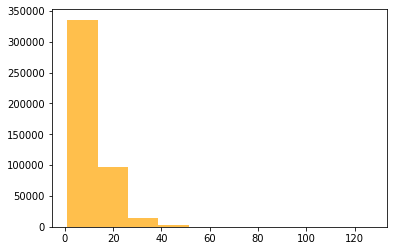

In [51]:
plt.hist(art_ped["product_id"],color='orange',alpha=0.7,bins=10)


In [52]:
order_products.groupby("order_id").count()["product_id"].mean()

10.098983215049127

 La mayoría de los clientes compran entre 1 y 45 artículos por orden
El máximo árticulos fue de 127.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [53]:
df=order_products.groupby("product_id")["reordered"].sum()

df=df.sort_values(ascending=False) #ordenando valores
df=df.iloc[0:20].reset_index()
print(df)

    product_id  reordered
0        24852      55763
1        13176      44450
2        21137      28639
3        21903      26233
4        47209      23629
5        47766      18743
6        27845      16251
7        47626      15044
8        27966      14748
9        16797      13945
10       26209      13327
11       22935      11145
12       24964      10411
13       45007      10076
14       49683       9538
15       28204       8989
16        8277       8836
17       39275       8799
18        5876       8412
19       49235       8389


In [54]:
print(df.min())
print(df.max())

product_id    5876
reordered     8389
dtype: int64
product_id    49683
reordered     55763
dtype: int64


In [55]:
df= df.merge(products, on='product_id', how='left') # uniendo dataframes
print(df[["product_name","reordered"]]) # mostrando ID y nombre

                product_name  reordered
0                     BANANA      55763
1     BAG OF ORGANIC BANANAS      44450
2       ORGANIC STRAWBERRIES      28639
3       ORGANIC BABY SPINACH      26233
4       ORGANIC HASS AVOCADO      23629
5            ORGANIC AVOCADO      18743
6         ORGANIC WHOLE MILK      16251
7                LARGE LEMON      15044
8        ORGANIC RASPBERRIES      14748
9               STRAWBERRIES      13945
10                     LIMES      13327
11      ORGANIC YELLOW ONION      11145
12            ORGANIC GARLIC      10411
13          ORGANIC ZUCCHINI      10076
14            CUCUMBER KIRBY       9538
15        ORGANIC FUJI APPLE       8989
16  APPLE HONEYCRISP ORGANIC       8836
17       ORGANIC BLUEBERRIES       8799
18             ORGANIC LEMON       8412
19       ORGANIC HALF & HALF       8389


<BarContainer object of 20 artists>

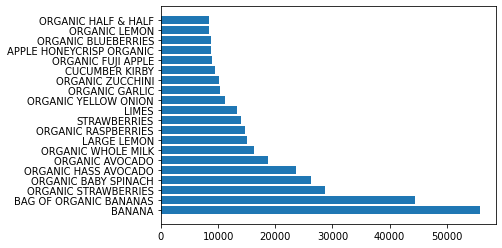

In [56]:
plt.barh(df["product_name"],df["reordered"])

El artículo que fue más veces ordenado es Banana

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [57]:
prod_reor=order_products.groupby("product_id")["reordered"].sum().reset_index() # productos reordenados
total_pro=order_products.groupby("product_id")["order_id"].count().reset_index() #productos totales


pro_reordered=prod_reor.merge(total_pro,on='product_id', how='left') # unión de dataframes

def proporcion(row):  # función para cálculo de proporción
    if row['order_id'] == 0:
        return 0  # Manejar división por cero
    return row['reordered'] / row['order_id']
 
pro_reordered["proporcion"]=pro_reordered.apply(proporcion, axis=1) # aplicando función en columna

display(pro_reordered)

,product_id,reordered,order_id,proporcion
0,1,158,280,0.564286
1,2,0,11,0.000000
2,3,31,42,0.738095
3,4,25,49,0.510204
4,7,1,2,0.500000
...,...,...,...,...
45568,49690,4,5,0.800000
45569,49691,31,72,0.430556
45570,49692,5,12,0.416667
45571,49693,11,25,0.440000


In [58]:
pro_reordered["proporcion"].mean() # promedio

0.38670677893645

In [59]:
pro_reordered=pro_reordered.merge(products, on='product_id', how='left') # uniendo dataframe para extraer nombre del producto

In [60]:
display(pro_reordered.loc[:,['product_id',"product_name","proporcion"]])

,product_id,product_name,proporcion
0,1,CHOCOLATE SANDWICH COOKIES,0.564286
1,2,ALL-SEASONS SALT,0.000000
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,0.738095
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,0.510204
4,7,PURE COCONUT WATER WITH ORANGE,0.500000
...,...,...,...
45568,49690,HIGH PERFORMANCE ENERGY DRINK,0.800000
45569,49691,ORIGINAL PANCAKE & WAFFLE MIX,0.430556
45570,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,0.416667
45571,49693,SPRING WATER BODY WASH,0.440000


En promedio los productos tienen un 38% de reorden.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [61]:

usuarios=orders.loc[:,["user_id","order_id"]] # extrayendo columnas de usuarios
ordenes=order_products.loc[:,["order_id","product_id","reordered"]] # extrayendo columnas de ordenes

ordenes=ordenes.merge(usuarios,on="order_id", how='left') # uniendo usuarios con productos
print(ordenes)

         order_id  product_id  reordered  user_id
0         2141543       11440          0    58454
1          567889        1560          1   129474
2         2261212       26683          1    47476
3          491251        8670          1   134505
4         2571142        1940          1   155995
...           ...         ...        ...      ...
4545002    577211       15290          1    76414
4545003   1219554       21914          0   163902
4545004    692640       47766          1      597
4545005    319435         691          1     7124
4545006   1398151       28733          0    85144

[4545007 rows x 4 columns]


In [62]:
pro_reor=ordenes.groupby("user_id")["reordered"].sum().reset_index()
total_pro=ordenes.groupby("user_id")["product_id"].count().reset_index()

pro_usu=pro_reor.merge(total_pro, on= "user_id",how='left')
display(pro_usu)

,user_id,reordered,product_id
0,2,1,26
1,4,0,2
2,5,8,12
3,6,0,4
4,7,13,14
...,...,...,...
149621,206203,6,27
149622,206206,15,21
149623,206207,41,46
149624,206208,87,125


In [63]:
def proporcion(row):  # función para cálculo de proporción
    if row['product_id'] == 0:
        return 0  # Manejar división por cero
    return row['reordered'] / row['product_id']

In [64]:
 pro_usu["proporcion"]=pro_usu.apply(proporcion, axis=1) # aplicando función en columna

display(pro_usu)

,user_id,reordered,product_id,proporcion
0,2,1,26,0.038462
1,4,0,2,0.000000
2,5,8,12,0.666667
3,6,0,4,0.000000
4,7,13,14,0.928571
...,...,...,...,...
149621,206203,6,27,0.222222
149622,206206,15,21,0.714286
149623,206207,41,46,0.891304
149624,206208,87,125,0.696000


In [65]:
pro_usu["proporcion"].mean()

0.4948531736151642

Los usuarios en promedio tiene una proporción de repedido de 0.49, es decir el 49% de productos que compra ya lo había comprado antes.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [66]:
uno_en_car =order_products[order_products["add_to_cart_order"]==1]

In [67]:
uno_en_car = uno_en_car.groupby("product_id")["add_to_cart_order"].count().reset_index()
uno_en_car = uno_en_car.sort_values(by="add_to_cart_order",ascending=False)
uno_en_car20=uno_en_car[0:19]
print(uno_en_car20)

       product_id  add_to_cart_order
13414       24852              15562
7127        13176              11026
15028       27845               4363
11384       21137               3946
25439       47209               3390
11786       21903               3336
25732       47766               3044
10622       19660               2336
9050        16797               2308
15102       27966               2024
24024       44632               1914
26519       49235               1797
25658       47626               1737
115           196               1733
20853       38689               1397
14158       26209               1370
6660        12341               1340
3153         5785               1310
14639       27086               1309


In [68]:
uno_en_car20=uno_en_car20.merge(products,on="product_id",how='left')[["product_id","product_name","add_to_cart_order"]]
print(uno_en_car20)

    product_id                 product_name  add_to_cart_order
0        24852                       BANANA              15562
1        13176       BAG OF ORGANIC BANANAS              11026
2        27845           ORGANIC WHOLE MILK               4363
3        21137         ORGANIC STRAWBERRIES               3946
4        47209         ORGANIC HASS AVOCADO               3390
5        21903         ORGANIC BABY SPINACH               3336
6        47766              ORGANIC AVOCADO               3044
7        19660                 SPRING WATER               2336
8        16797                 STRAWBERRIES               2308
9        27966          ORGANIC RASPBERRIES               2024
10       44632   SPARKLING WATER GRAPEFRUIT               1914
11       49235          ORGANIC HALF & HALF               1797
12       47626                  LARGE LEMON               1737
13         196                         SODA               1733
14       38689     ORGANIC REDUCED FAT MILK            

El articulo más priorizado en los carritos es BANANA

### Conclusion general del proyecto:

Los hallazgos encontrados en el análisis de datos de Instacart fueron:
La mayor demanda de órdenes se dan entre las 10:00 am y 3:00 pm.
Los días de mayor demanda de órdenes son los domingos y lunes.
La mayoría vuelve a comprar en 5 a 7 días aproximadamente, o luego de 30 días.
Los pedidos que ingresan los miércoles y sábados tienen demanda similiar en horas determinadas.
Dentro de los productos más solicitados están los productos orgánicos
La mayoría de los clientes compran entre 1 y 45 artículos por orden.La orden con más artículos fue una de 127 productos.
El artículo que fue más veces ordenado es Banana.
En promedio los productos tienen un 38% de reorden.
Los usuarios en promedio tiene una proporción de repedido de 0.49, es decir el 49% de productos que compra ya lo había comprado antes.



Por otro lado, se encontró valores ausentes en la tabla "orders" en la columna "days_since_prior_order", sin embargo se decidió mantenerlos porque esto significaría que el cliente aun no ha hecho un segundo pedido. Además tampoco se reemplazo por un valor 0 porque podría variar la información, se decidió mantener el tipo dato.
En el dataframe "products" existía valores ausentes en la columna "product_name".Reemplazamos estos valores por "Unknown".

También hay nombres de productos que se repiten.Estos se mantuvieron ya que puede tratarse de mismo producto pero diferente presentaciones. Los product_id si son valores únicos.

En el dataframe "order_products" existía valores ausentes en la columna "add_to_cart_order", y el tipo de dato era float,por que lo que se procedió a cambiar a un  tipo de dato entero y reemplazar los valores ausentes por 999, lo que peritiría el camabio de tipo de dato.

En la tabla orders, se encontró valore duplicados y estos se dieron en un momento determinado order_dow= 3 , order_hour_of_day=2 , quizá hubo algún error de sistema en ese horario, seprocedió a eliminar los datos duplicados ya que podrían variar notablemente la data.

Pienso que hubo errores en el registro de los nombres, pero podría bastar reconocer el producto por su id, y no ser necesario borrar la información ausente o repetida en nombre de producto.

Todos los productos con nombre de productos ausentes son de "aisle_id"=100 y "department_id"=21. Sin embargo no hay registro de department_id =100, y si existe aisle_id=21.



Con los hallazgos se pueden encontrar algunos patrones de compras, como los productos más vendidos y los horarios y días de mayor demanda.Así como la frecuencia de compra de los clientes.

Como sugerencia es revisar el correcto registro de sus órdenes porque de aqui salen información valiosa para la toma de decisiones, se encontró un id_dep en órdenes que no se registraba en la tabla id_departamentos. Para ello podrían restringir el llenado con una lista para la validación de datos, o que muestre error si se resgistra algún valor no existente.
 
Instacart dependiendo de cuáles sean sus objetivos comerciales, podría ofrecer ofertas los días de demanda baja para nivelarla, o por el contrario ofrecerlas en los dias de mayor demanda para aumentar aun más las ventas. Además abastecercer de stock en los producto más demandados, reforzar personal para dar una buena y completa atención a todos sus clientes.
La importancia de conocer la demanda de los productos comestibles es poder tener una buena politica de reabastecimiento de sus productos, ni mucho porque se vencen y se pierde dinero, ni poco porque se rompe stock y no satisface la demanda.
 
 
Respecto al proyecto me costó un poco enteder la información que contenía cada tabla, la necesidad de unir dos tablas a través de una key para obtener más información. Tambien aprendí que la función groupby devolvía una series y no un dataframe.
 
 
 
 
 
 

<div class="alert alert-block alert-success">    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Qué gran trabajo has hecho!  &#128077;  Podemos aprobar el proyecto. <br>

</div>